In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
db = pd.read_csv('diabetes.csv')
print(db.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
db.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

c:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


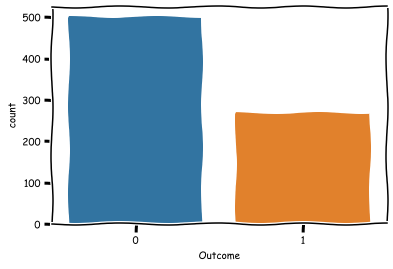

In [10]:
import seaborn as sns
sns.countplot(db['Outcome'], label='Count')
plt.xkcd()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(db.loc[:, db.columns != 'Outcome'], db['Outcome'], stratify=db['Outcome'], random_state=66)


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.802


c:\python 39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
idata=(15,200,110,32,110,37.1,0.153,40)
idata_as_numpy_arr = np.asarray(idata)
idata_reshaped = idata_as_numpy_arr.reshape(1,-1)
std_data = scaler.transform(idata_reshaped)
print(std_data)

[[ 3.13454763  2.30251133  2.46861206  0.67937291  0.14722158  0.66549954
  -0.92861197  0.51960894]]


c:\python 39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
prediction = mlp.predict(std_data)
print(prediction)

[1]


In [15]:

# plt.xlabel=('Glucose value')
# plt.ylabel=('Outcome')
# plt.scatter(db['Glucose'],db['Outcome'], label='Prediction', marker='x')

In [16]:
import pickle
pickle.dump(mlp,open('classifier.pkl','wb'))

In [17]:
pickle.dump(scaler,open('scaler.pkl','wb'))